# ML | CREDIT CARD FRAUD DETECTION
## Using Random Forest Classifier using Scikit Learn

### INPORTING Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### Loading The Data

In [2]:
data = pd.read_csv("F:\machine learning projects\CLASSIFICATION\P01\creditcard.csv")

### Understanding the data

In [3]:
# view the first 10 rows
print('Shape of the data: ', data.shape)
data.head(10)

Shape of the data:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Describing  the Data

In [4]:

#print the shape of the data
data_sample = data.sample(frac = 0.1, random_state = 48) # we use this code to get a sample of our data 10 % of the data, for faster processing

print('shape of the data')
print(data_sample.shape)
print('\n Summary of data \n')
print(data_sample.describe())

shape of the data
(28481, 31)

 Summary of data 

                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.00

### Imbalance in the data

In [5]:
# To determine number of fraud cases in data set
fraud = data_sample[data_sample['Class']== 1]
valid = data_sample[data_sample['Class']== 0]

outlierFraction = len(fraud)/float(len(valid)) * 100
print(outlierFraction, '%')
print('Fraud Cases : {}'.format(len(data_sample[data_sample['Class']==1])))
print('The Valid Transactions : {}'.format(len(data_sample[data_sample['Class']==0])))

0.19700967458223395 %
Fraud Cases : 56
The Valid Transactions : 28425


This show that only 0.19 % were fraudulent transactions out of all the trasactions.
#### This data is Highly Unbalanced
first we will apply our model without balancing it if we dont get a good accuracy then we can find a way to balance this data set.

### details for Fraudulent Transactions 

In [6]:
print('Amount details of the Fraudulent Transactions')
fraud.Amount.describe()

Amount details of the Fraudulent Transactions


count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64

### details for Valid Transactions 

In [7]:
print('Amount details of the Valid Transactions')
valid.Amount.describe()

Amount details of the Valid Transactions


count    28425.000000
mean        88.572094
std        234.229021
min          0.000000
25%          5.980000
50%         21.990000
75%         77.000000
max       6000.000000
Name: Amount, dtype: float64

As we can see the Mean for the fraud trasactions is High Thisis a crucial problem that needs to be dealt with

### Plotting the Correlation Matrix
in this method we can be able to have an idea of how features correlate with each other and can help us predict what features that are most relevant for the prediction.

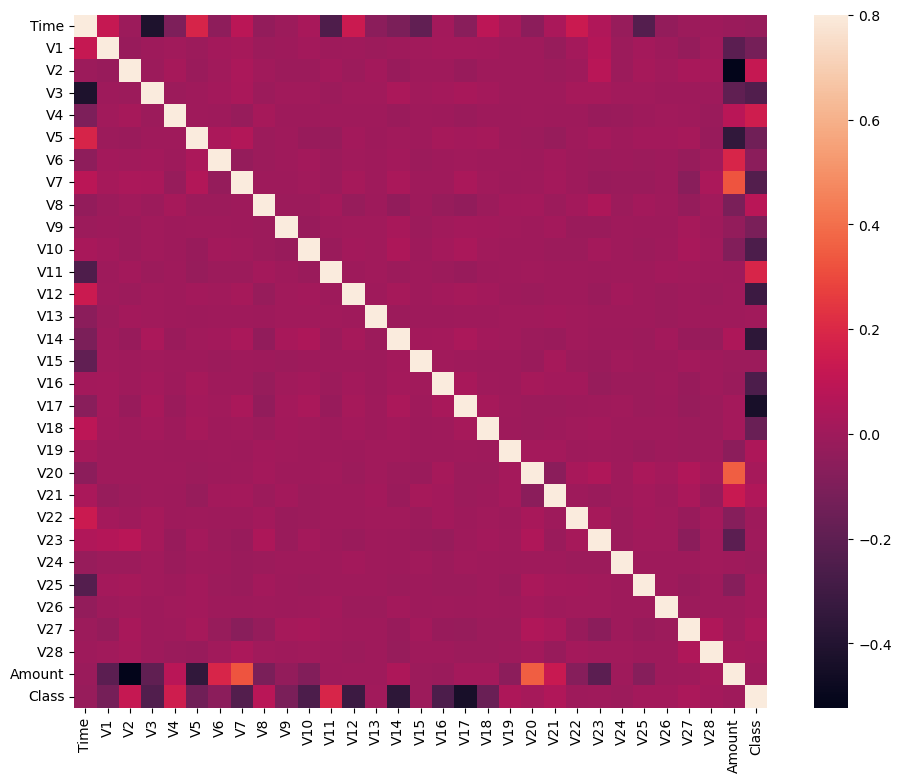

In [8]:
#Correlation Matrix
corrmat = data_sample.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

we can see that  most of the features do not correlate to other features but there are some features that eiter has a positive or negative correlation,example is the v2  and the ammount have a negative correlation.

### Separating the X and the Y values.
Divinding the data into inputs parameters and outputs value formart.

In [9]:
# dividing the X and Y from the dataset
X = data_sample.drop(['Class'], axis = 1)
Y = data_sample['Class']
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [10]:
# getting Just the values for the sake of processing
#(itsa a numpy array with no columns)
xData = X.values
yData = Y.values

### Training and Testing Bifurcation
now we split the data into Two main Groups. One Training The model and the other for testing our models performance.

In [13]:
# WE use Scikit-learn to split the data.
from sklearn.model_selection import train_test_split

# split the data into training and testing

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

## Building a Random Forest Model using scikit learn

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Model
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Predictions
yPred = rfc.predict(xTest)

### Building all Kinds of evaluating Prameters

Evaluating the classifier

Printing every score of the classifier

Scoring in everything

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [20]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print('The model used is Random Forest Classifier')

acc = accuracy_score(yTest, yPred)
print('The Accuracy  is {}'.format(acc))

prec = precision_score (yTest, yPred)
print('The Precision is {}'.format(prec))

rec = recall_score(yTest, yPred)
print('The Recall is {} '.format(rec))

f1 = f1_score(yTest, yPred)
print('The F1-Score is {} '.format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print('The Matthews Correlation Coefficent is {}'.format(MCC))


The model used is Random Forest Classifier
The Accuracy  is 0.9992978760751272
The Precision is 1.0
The Recall is 0.7333333333333333 
The F1-Score is 0.846153846153846 
The Matthews Correlation Coefficent is 0.8560475724861787


### Visualiz the Confusion Matrix

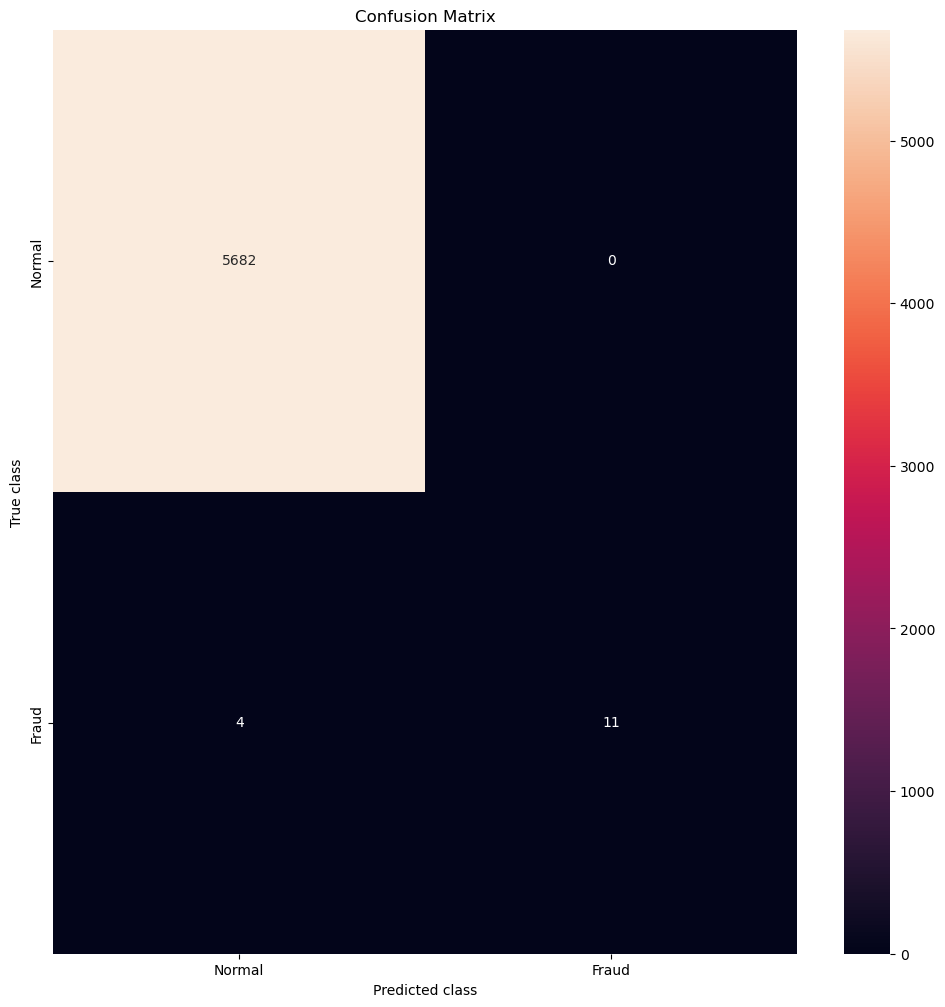

In [21]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize = (12 ,12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
           yticklabels = LABELS, annot =True, fmt = "d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
            

### Our Random Forest Model is giving us better results even for the Recall which is usually the most tricky part

Joseph Wathome's work.